In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [3]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.drop(columns=["RowNumber","Surname","CustomerId"],inplace=True)
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
x=data.drop(columns=["Exited"],axis=1)
y=data["Exited"]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
'''split columns as per their datatypes'''
numerical=xtrain.select_dtypes(include=["int64","float64"]).columns
categorical=xtrain.select_dtypes(include=["object"]).columns

In [10]:
'''
MinMaxScaler (MinMaxTransformer):
The MinMaxScaler (sometimes referred to as MinMaxTransformer) is a feature scaling technique that transforms the data to a 
specific range, typically between 0 and 1. This is useful when features have different scales and you want to ensure that all 
features contribute equally to the model, especially for distance-based algorithms like KNN or gradient-based algorithms like
neural networks.
Example:
If you have a feature column with values [1, 2, 3, 4, 5], applying MinMax scaling to this feature would convert it to 
[0, 0.25, 0.5, 0.75, 1] (scaled between 0 and 1).

One-Hot Encoding:
One-hot encoding is a technique used to convert categorical variables (those that contain two or more categories) into a format
that can be provided to machine learning algorithms to improve their performance.
How it Works:
For each unique category in a feature, one-hot encoding creates a new binary (0 or 1) feature. The value for a given category 
is 1 in its corresponding feature column and 0 for all other columns.
'''

'\nMinMaxScaler (MinMaxTransformer):\nThe MinMaxScaler (sometimes referred to as MinMaxTransformer) is a feature scaling technique that transforms the data to a \nspecific range, typically between 0 and 1. This is useful when features have different scales and you want to ensure that all \nfeatures contribute equally to the model, especially for distance-based algorithms like KNN or gradient-based algorithms like\nneural networks.\nExample:\nIf you have a feature column with values [1, 2, 3, 4, 5], applying MinMax scaling to this feature would convert it to \n[0, 0.25, 0.5, 0.75, 1] (scaled between 0 and 1).\n\nOne-Hot Encoding:\nOne-hot encoding is a technique used to convert categorical variables (those that contain two or more categories) into a format\nthat can be provided to machine learning algorithms to improve their performance.\nHow it Works:\nFor each unique category in a feature, one-hot encoding creates a new binary (0 or 1) feature. The value for a given category \nis 1 in

In [11]:
processor=ColumnTransformer(
    transformers=[("num",MinMaxScaler(),numerical),("cat",OneHotEncoder(sparse=False),categorical)])


In [12]:
xtrain_processed=processor.fit_transform(xtrain)
xtest_processed=processor.fit_transform(xtest)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
pd.DataFrame(xtrain_processed),xtrain_processed[0].shape

(         0         1    2         3         4    5    6         7    8    9   \
 0     0.672  0.189189  0.6  0.000000  0.333333  1.0  1.0  0.895550  1.0  0.0   
 1     0.564  0.324324  0.4  0.476786  0.333333  1.0  1.0  0.980029  0.0  1.0   
 2     0.418  0.081081  0.3  0.457317  0.000000  1.0  0.0  0.429261  0.0  0.0   
 3     0.422  0.121622  0.9  0.540606  0.000000  1.0  0.0  0.765408  1.0  0.0   
 4     0.334  0.513514  0.9  0.566554  0.000000  0.0  0.0  0.197107  1.0  0.0   
 ...     ...       ...  ...       ...       ...  ...  ...       ...  ...  ...   
 7995  0.836  0.486486  0.8  0.277853  0.000000  1.0  1.0  0.346662  1.0  0.0   
 7996  0.664  0.540541  0.1  0.000000  0.000000  1.0  1.0  0.003084  1.0  0.0   
 7997  0.770  0.270270  0.1  0.000000  0.666667  0.0  0.0  0.460925  1.0  0.0   
 7998  0.634  0.337838  0.8  0.758186  0.000000  1.0  0.0  0.487381  1.0  0.0   
 7999  0.694  0.445946  0.1  0.589523  0.000000  1.0  1.0  0.267615  0.0  1.0   
 
        10   11   12  
 0 

In [14]:
xtest_processed,xtest_processed[0].shape

(array([[0.492     , 0.18918919, 0.3       , ..., 0.        , 0.        ,
         1.        ],
        [0.546     , 0.33783784, 0.1       , ..., 0.        , 0.        ,
         1.        ],
        [0.502     , 0.35135135, 0.4       , ..., 1.        , 1.        ,
         0.        ],
        ...,
        [0.76      , 0.39189189, 0.7       , ..., 0.        , 1.        ,
         0.        ],
        [0.684     , 0.14864865, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.556     , 0.28378378, 0.1       , ..., 0.        , 0.        ,
         1.        ]]),
 (13,))

In [15]:
'''
1. Sequential Model:

A Sequential model in Keras is a linear stack of layers, where each layer has exactly one input tensor and one output tensor. 
The model is constructed layer by layer, and it is the most common and simple type of model when building neural networks in 
Keras. It is called "sequential" because the layers are added in sequence.

Why use it:
Simple to implement: The Sequential model is best suited for straightforward problems where layers are stacked one after
another.Easier to debug: It's easier to visualize the structure of the network.Suitable for feedforward neural networks: When each layer takes the output of the previous layer as input, the Sequential model 
works perfectly.

2. Dense Layer:

A Dense layer in neural networks is a fully connected layer, meaning each neuron in this layer is connected to every neuron in 
the previous layer. It is used for performing high-level feature extraction, and it's the most commonly used type of layer in
a neural network.

Why use it:
Versatile: The dense layer is used for both classification and regression tasks.
Feature learning: The dense layer allows the model to learn complex relationships between the input features.

3. ReLU Activation (Rectified Linear Unit):

ReLU is a commonly used activation function in neural networks that outputs the input directly if it is positive; otherwise, 
it will output zero. In mathematical terms:
ReLU(x)=max(0,x)
Why use ReLU:
Non-linearity: ReLU introduces non-linearity, which allows neural networks to learn more complex functions.
Computationally efficient: ReLU is very fast to compute, especially compared to other activation functions like sigmoid or tanh.
Avoids vanishing gradient problem: ReLU helps mitigate the vanishing gradient problem, where gradients become too small for
deep networks to learn effectively.

Why use in binary classification:
ReLU is typically used in hidden layers because it allows the network to learn complex features in the data. It's a great 
choice for intermediate layers in binary classification tasks because it helps capture non-linear patterns.


4. Sigmoid Activation:

Sigmoid is an activation function that outputs a value between 0 and 1, making it suitable for binary classification problems, 
where the output needs to be a probability or a binary class (0 or 1). It is defined as: 
Why use Sigmoid:
Binary Output: In binary classification, the sigmoid function provides a probability value that can be interpreted as the 
likelihood of the input belonging to the positive class (1) or negative class (0).
Output between 0 and 1: It squashes the output between 0 and 1, which is useful for binary classification problems.
Why use in binary classification:
For binary classification, the final output layer should have a sigmoid activation, as it outputs a value between 0 and 1, 
which can be treated as the probability of the positive class.

5. Loss Function:

A loss function is a way of measuring how well a machine learning model is performing. It computes the difference between the
predicted output and the actual target value, providing a signal to adjust the weights of the model during training.

Common Loss Function for Binary Classification:
For binary classification, the most common loss function is Binary Cross-Entropy (also called Log Loss), which is defined as:

Binary Cross-Entropy penalizes the model more heavily when the predicted probability deviates significantly from the actual 
class label.

6. Optimizer:
An optimizer is a method or algorithm used to minimize (or maximize) the loss function by updating the weights of the model 
during training. Optimizers adjust the learning rate, and they define how the weights should be updated based on the gradients
calculated during backpropagation.

Common Optimizers:
Adam (Adaptive Moment Estimation): This is one of the most widely used optimizers because it combines the advantages of both AdaGrad and RMSProp, and it is effective in many different scenarios.

It adjusts the learning rate for each parameter during training.
It works well for large datasets and complex models.



'''

'\n1. Sequential Model:\n\nA Sequential model in Keras is a linear stack of layers, where each layer has exactly one input tensor and one output tensor. \nThe model is constructed layer by layer, and it is the most common and simple type of model when building neural networks in \nKeras. It is called "sequential" because the layers are added in sequence.\n\nWhy use it:\nSimple to implement: The Sequential model is best suited for straightforward problems where layers are stacked one after\nanother.Easier to debug: It\'s easier to visualize the structure of the network.Suitable for feedforward neural networks: When each layer takes the output of the previous layer as input, the Sequential model \nworks perfectly.\n\n2. Dense Layer:\n\nA Dense layer in neural networks is a fully connected layer, meaning each neuron in this layer is connected to every neuron in \nthe previous layer. It is used for performing high-level feature extraction, and it\'s the most commonly used type of layer in\

In [16]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_shape=(13,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
         optimizer=tf.keras.optimizers.Adam(),
         metrics=["accuracy"])
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
his=model.fit(tf.expand_dims(xtrain_processed,axis=-1),ytrain,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7906 - loss: 0.5534
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7986 - loss: 0.4799
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7943 - loss: 0.4717
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7949 - loss: 0.4581
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7952 - loss: 0.4560
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8052 - loss: 0.4390
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8227 - loss: 0.4281
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8216 - loss: 0.4284
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8216 - loss: 0.4149
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8281 - loss: 0.4155
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8295 - loss: 0.4163
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [18]:
'''history object is a convenient way to access and track how your model's performance evolves during training.'''

"history object is a convenient way to access and track how your model's performance evolves during training."

<Axes: >

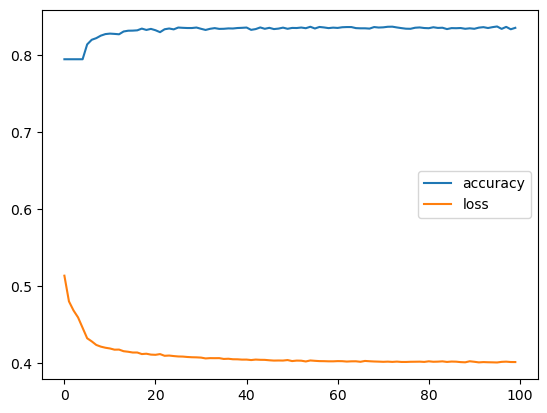

In [19]:
pd.DataFrame(his.history).plot()

In [20]:
model.evaluate(xtest_processed,ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8372 - loss: 0.4043


[0.38876375555992126, 0.8445000052452087]

In [21]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_shape=(13,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
         optimizer=tf.keras.optimizers.Adam(),
         metrics=["accuracy"])
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
'''
What is Learning Rate?
The learning rate is a hyperparameter in machine learning and neural networks that controls how much the model's weights are
updated with respect to the loss during training. In simple terms, it determines the size of the steps the model takes when 
optimizing the loss function during training.

What is a Callback?
A callback is a function or set of functions that are called during training at certain points, allowing you to monitor or 
change the behavior of the training process.

What is Learning Rate Scheduler (Learning Rate Callback)?
A learning rate scheduler (or learning rate callback) is a callback used to adjust the learning rate during training according 
to a pre-defined schedule. The idea is to modify the learning rate as training progresses. This can help the model converge
more quickly and avoid overshooting the optimal point.
'''

"\nWhat is Learning Rate?\nThe learning rate is a hyperparameter in machine learning and neural networks that controls how much the model's weights are\nupdated with respect to the loss during training. In simple terms, it determines the size of the steps the model takes when \noptimizing the loss function during training.\n\nWhat is a Callback?\nA callback is a function or set of functions that are called during training at certain points, allowing you to monitor or \nchange the behavior of the training process.\n\nWhat is Learning Rate Scheduler (Learning Rate Callback)?\nA learning rate scheduler (or learning rate callback) is a callback used to adjust the learning rate during training according \nto a pre-defined schedule. The idea is to modify the learning rate as training progresses. This can help the model converge\nmore quickly and avoid overshooting the optimal point.\n"

In [23]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["accuracy"])

history2=model2.fit(xtrain_processed,ytrain,epochs=40,callbacks=[lr_scheduler])

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2311 - loss: 1.2342 - learning_rate: 1.0000e-04
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3342 - loss: 0.8472 - learning_rate: 1.1220e-04
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5445 - loss: 0.7121 - learning_rate: 1.2589e-04
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7291 - loss: 0.6531 - learning_rate: 1.4125e-04
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7963 - loss: 0.6118 - learning_rate: 1.5849e-04
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7924 - loss: 0.5744 - learning_rate: 1.7783e-04
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7854 - loss: 0.5393 - learning_rate: 1.9953e-04
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8006 - loss: 0.5013 - learning_rate: 2.2387e-04
Epoch 9/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7937 - loss: 0.4993 - 

Text(0, 0.5, 'loss')

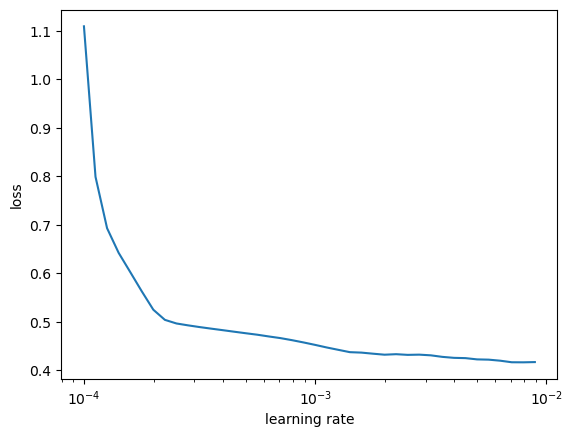

In [24]:
lrs = 1e-4 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs,history2.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [25]:
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history3=model3.fit(xtrain_processed,ytrain,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7931 - loss: 0.6567
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7959 - loss: 0.4789
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - loss: 0.4532
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7888 - loss: 0.4686
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7961 - loss: 0.4534
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7947 - loss: 0.4488
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 0.4458
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4337
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8012 - loss: 0.4320
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8075 - loss: 0.4352
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8181 - loss: 0.4215
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

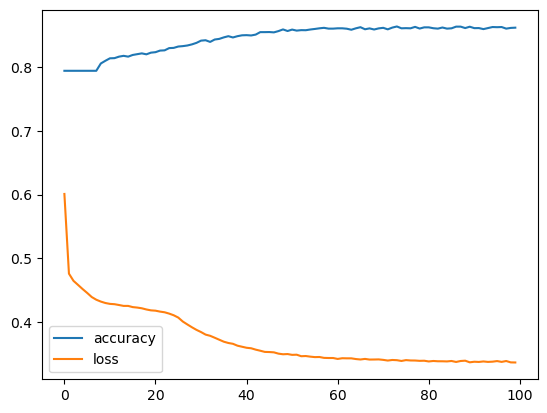

In [26]:
pd.DataFrame(history3.history).plot()

In [27]:
'''
What is a Confusion Matrix?
A confusion matrix is a performance measurement tool used to evaluate the accuracy of a classification model, especially in
binary and multi-class classification tasks. It shows how well the model's predictions match the actual (true) labels of the 
data.

The matrix helps in understanding:

True positives (TP): The cases where the model correctly predicted the positive class.
True negatives (TN): The cases where the model correctly predicted the negative class.
False positives (FP): The cases where the model incorrectly predicted the positive class (Type I error).
False negatives (FN): The cases where the model incorrectly predicted the negative class (Type II error).
'''

"\nWhat is a Confusion Matrix?\nA confusion matrix is a performance measurement tool used to evaluate the accuracy of a classification model, especially in\nbinary and multi-class classification tasks. It shows how well the model's predictions match the actual (true) labels of the \ndata.\n\nThe matrix helps in understanding:\n\nTrue positives (TP): The cases where the model correctly predicted the positive class.\nTrue negatives (TN): The cases where the model correctly predicted the negative class.\nFalse positives (FP): The cases where the model incorrectly predicted the positive class (Type I error).\nFalse negatives (FN): The cases where the model incorrectly predicted the negative class (Type II error).\n"

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


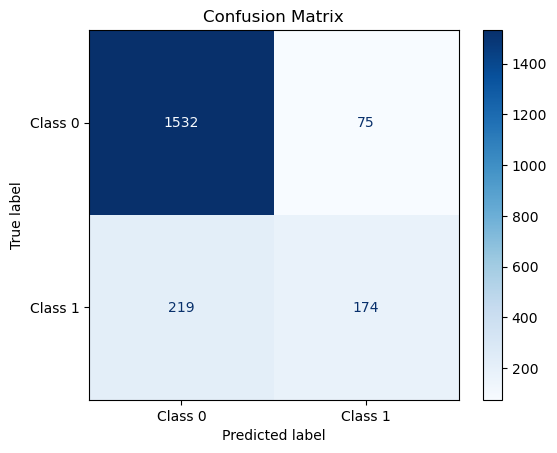

In [28]:
ypred=model3.predict(xtest_processed)
cm = confusion_matrix(ytest, (ypred > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
'''
Here’s a breakdown of the neural network code for predicting customer churn using TensorFlow and Keras:

### 1. **Data Loading and Preprocessing**
   - **Data Loading:** The dataset `Churn_Modelling.csv` is read into a DataFrame using `pd.read_csv`.
   - **Missing Values:** `data.isnull().sum()` checks for missing values.
   - **Dropping Columns:** Irrelevant columns (`RowNumber`, `Surname`, and `CustomerId`) are dropped using `data.drop(columns=...)`.
   - **Separating Features and Target:** The features (`x`) and target (`y`) are separated, where `Exited` is the target column indicating churn.
   
### 2. **Train-Test Split**
   - Using `train_test_split` with a `test_size` of 0.2, the data is split into training and testing sets.

### 3. **Column Transforming**
   - **Numeric and Categorical Columns:** Numeric columns are scaled using `MinMaxScaler`, and categorical columns are one-hot encoded.
   - **ColumnTransformer:** Combines numeric and categorical transformations to standardize and prepare `xtrain` and `xtest` for training.

### 4. **Building the Model**
   - **Defining Layers:** Three models (`model`, `model2`, and `model3`) are built using `tf.keras.Sequential`.
   - **Layers:**
      - The input layer has **13 features**.
      - `Dense` layers are added with activation functions (`relu` for hidden layers and `sigmoid` for binary output).
      - Activation functions:
         - **ReLU** (Rectified Linear Unit) introduces non-linearity to hidden layers.
         - **Sigmoid** activation in the output layer squashes the output between 0 and 1, suitable for binary classification.

### 5. **Compiling the Model**
   - **Loss Function:** Binary Cross-Entropy is used to measure the difference between actual and predicted values. The formula for binary cross-entropy is:
     
     {Loss} = {1}/{N} \sum_{i=1}^{N} ( y_i * \log(p_i) + (1 - y_i) * log(1 - p_i) )
     
     where \( y_i \) is the actual label, and \( p_i \) is the predicted probability.
   - **Optimizer:** Adam optimizer is used, known for its adaptive learning rate.
   - **Metrics:** Accuracy is tracked during training.

### 6. **Training the Model**
   - **Model Training:** `model.fit` is used to train the model, with `epochs=100` indicating 100 iterations over the dataset.
   - **Learning Rate Scheduler:** For `model2`, a learning rate scheduler (`LearningRateScheduler`) adjusts the learning rate during training. Here, the learning rate is adjusted using an exponential scale function:
     
     {Learning Rate} = 1e-4 * 10^{{{epoch}}/{20}}
     

### 7. **Model Evaluation and Plotting**
   - **Evaluation:** After training, `model.evaluate` calculates accuracy and loss on the test set.
   - **Training History:** The loss and accuracy history of the training process (`his.history`) is plotted to visualize model performance over epochs.

This code provides a basic binary classification neural network for churn prediction, leveraging data preprocessing, feature scaling, neural network model building, and training in Keras.
'''

In [ ]:
'''
Here are concise explanations for each:

1) **Normalization:** Scaling data to a fixed range, usually [0, 1] or [-1, 1]. Common formula:
   \[
   x' = {x - min(x)}/{\max(x) - min(x)}
   \]

2) **Standardization:** Adjusting data to have a mean of 0 and a standard deviation of 1. Common formula:
   \[
   x' = {x - u}/{\sigma}
   \]
   where \(\mu\) is the mean, and \(\sigma\) is the standard deviation.

3) **Confusion Matrix:** A table showing the performance of a classification model by displaying true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

4) **Metrics:**
   - **Classification Accuracy:** The ratio of correct predictions to total predictions.
     \[
     \text{Accuracy} = {TP + TN}/{TP + TN + FP + FN}
     \]
   - **Misclassification Rate (Error Rate):** The ratio of incorrect predictions to total predictions.
     \[
     \text{Error Rate} = {FP + FN}/{TP + TN + FP + FN}
     \]
   - **Precision:** The ratio of true positive predictions to all positive predictions.
     \[
     \text{Precision} = {TP}/{TP + FP}
     \]

5) **Confusion Matrix Example:**
   - For a binary classifier:
     |       | Predicted Positive | Predicted Negative |
     |-------|---------------------|---------------------|
     | Actual Positive | TP = 50               | FN = 10               |
     | Actual Negative | FP = 5                | TN = 35               | 

   Here, Accuracy = ({50 + 35}/{50 + 35 + 5 + 10} = 85%).
   
   
   
   
   1.   Artificial Neural Network (ANN) 
ANN is a computational model inspired by the human brain, consisting 
of interconnected nodes (neurons) that learn patterns in data for tasks 
like classification and prediction. 
2.  Keras 
Keras is a high-level neural network library in Python, built on top of 
TensorFlow, that simplifies building and training deep learning models. 
3.   TensorFlow 
TensorFlow is an open-source machine learning framework that 
supports building, training, and deploying large-scale machine learning 
and deep learning models. 
4.   
5.   
Normalization 
Normalization is the process of scaling data to a standard range (usually 
0 to 1) to ensure each feature contributes equally to model performance. 
Confusion Matrix 
A confusion matrix is a table that shows the performance of a 
classification model by comparing actual vs. predicted values for each 
class, helping to evaluate accuracy, precision, and recall.
'''